# Image Segmentation : Shelter Map Identification

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os
import numpy as np
import shelter.train as T
import shelter.predict as P
from shelter.preprocessing.data import create_train_data, create_test_data
from resources.plot_results import plot_loss_epoch

Using TensorFlow backend.


In [5]:
data_path = '/media/data/180505_v1'

Creating training images...
Dataset size: 10
sample data:


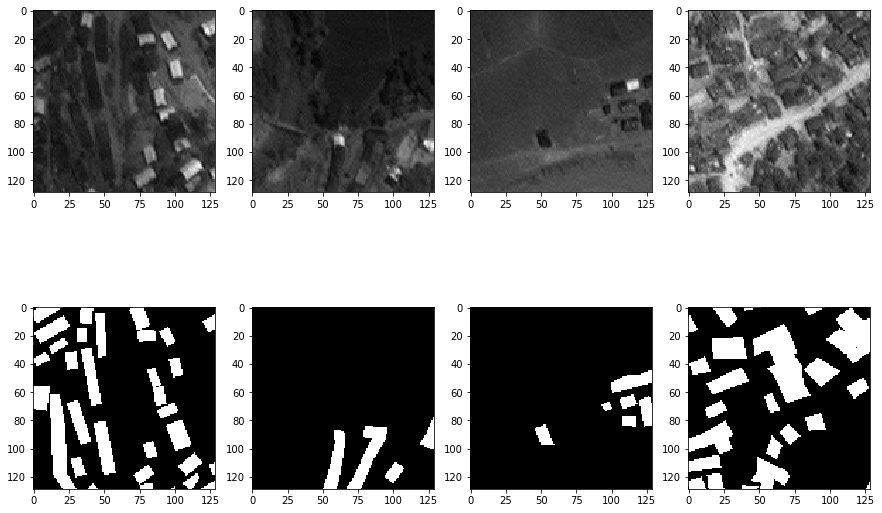

Loading done.
Saving to .npy files done.


In [3]:
create_train_data(data_path,showSample=True,showNumSample=4)

In [6]:
create_test_data(data_path)

Creating test images...
Dataset size: 10
Loading done.
Saving to .npy files done.


### Available models: 'unet','flatunet', 'unet64filters', or 'unet64batchnorm'

#### U-Net

[Original U-Net :](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)
![U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [ ]:
train_1 = T.train(data_path,'unet',number_of_epochs=10,batch_size=1,test_data_fraction=0.2,checkpoint_period=1)

Loss function : $$ \mathrm{ - Dice~Coeff.} = - \frac{2 |X \cap Y|}{|X| + |Y|} = - \frac{2 TP}{2TP + FP + FN}$$

Dice = 1  --> identical images,
Dice ~= 0  --> very dissimilar images.

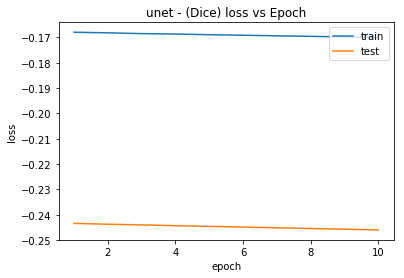

In [7]:
#plot_loss_epoch('/media/data/180505_v1/internal/checkpoints/','unet')
plot_loss_epoch('/media/data/July20-2018/','unet')

In [ ]:
P.predict(data_path,'unet')

#### Mod U-Net 

[Original mod-U-net](https://deepsense.ai/wp-content/uploads/2017/04/architecture_details.png)
![Link: mod-U-net](https://deepsense.ai/wp-content/uploads/2017/04/architecture_details.png)

In [ ]:
train_2 = T.train(data_path,'flatunet',number_of_epochs=10,batch_size=1,test_data_fraction=0.2,checkpoint_period=1)

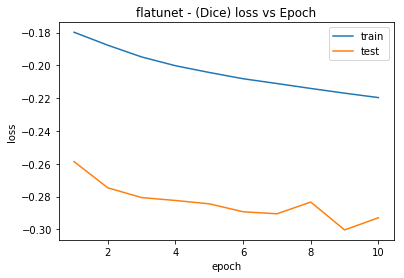

In [8]:
#plot_loss_epoch('/media/data/180505_v1/internal/checkpoints/','flatunet')
plot_loss_epoch('/media/data/July20-2018/','flatunet')

In [ ]:
P.predict(data_path,'flatunet')

#### "U-Net 64 filters" : all layers have 64 kernels 

In [ ]:
train_3 = T.train(data_path,'unet64filters',number_of_epochs=10,batch_size=1,test_data_fraction=0.2,checkpoint_period=1)

In [ ]:
# plot_loss_epoch('/media/data/180505_v1/internal/checkpoints/','unet64filters')
plot_loss_epoch('/media/data/July20-2018/','unet64filters')

In [ ]:
# P.predict(data_path,'unet64filters')
P.predict(data_path,'unet64filters',ckpt_path_='/media/data/July20-2018/')

#### "U-Net 64 batchnorm" : all layers have 64 kernels and batchnormalized 

In [ ]:
train_4 = T.train(data_path,'unet64batchnorm',number_of_epochs=10,batch_size=1,test_data_fraction=0.2,checkpoint_period=1)

In [ ]:
#plot_loss_epoch('/media/data/180505_v1/internal/checkpoints/','unet64batchnorm')
plot_loss_epoch('/media/data/July20-2018/','unet64batchnorm')

In [ ]:
#P.predict(data_path,'unet64batchnorm')
P.predict(data_path,'unet64batchnorm',ckpt_path_='/media/data/July20-2018/')